## A single neuron

In [1]:
inputs = [1, 2, 3]
weights = [0.2, 0.8, -0.5]

There is one bias value per neuron

In [2]:
bias = 2

In [3]:
output = sum([inputs[i] * weights[i] for i in range(len(inputs))]) + bias
print(output)

2.3


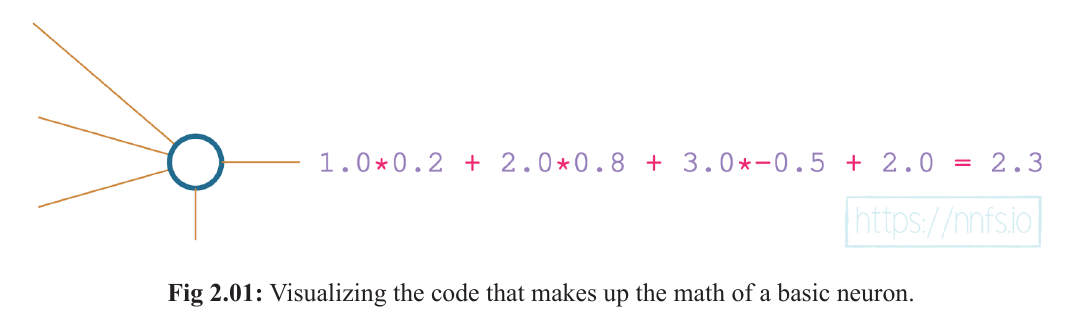

Lets add another input

In [4]:
inputs = [1, 2, 3, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]

In [5]:
output = sum([inputs[i] * weights[i] for i in range(len(inputs))]) + bias
print(output)

4.8


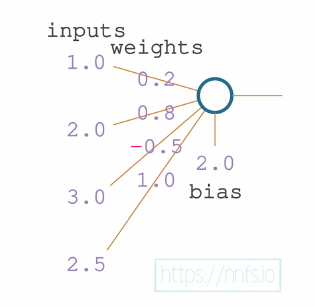

## A Layer of Neurons

A layer is nothing more than a group of neurons. Each neuron in a layer takes the same input, but contains its own weights and biases, producing its own unique output

In [6]:
inputs = [1, 2, 3, 2.5]
weights = [
    [0.2, 0.8, -0.5, 1], 
    [0.5, -0.91, 0.26, -0.5], 
    [-0.26, -0.27, 0.17, 0.87]
]
bias = [2, 3, 0.5]

In [7]:
def compute_neuron_output(inputs, weights, bias):
    sum = 0
    for i, w in zip(inputs, weights):
        sum += i * w
    return sum + bias

outputs = [compute_neuron_output(inputs, weights[i], bias[i]) for i in range(3)]
print(outputs)

[4.8, 1.21, 2.385]


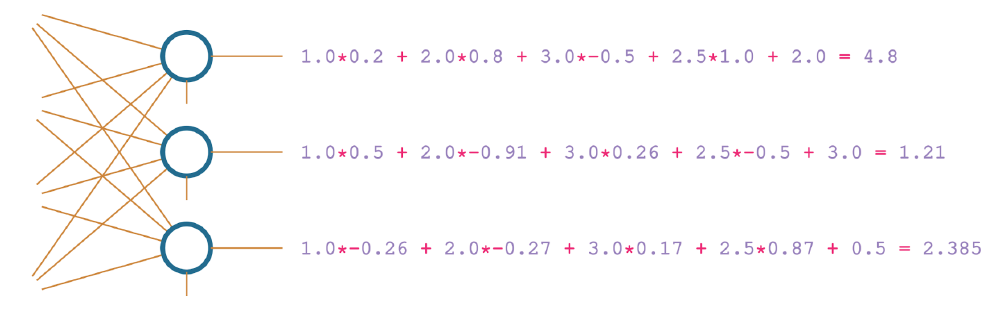

**Fully Connected Neural Network**: Every neuron in the current layer has connections to every neuron from the previous layer
- This is very common
- There is no requirement to fully connect everything

## A Single Neuron with Numpy

In [8]:
import numpy as np

inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0

In [9]:
output = np.dot(inputs, weights) + bias
print(output)

4.8


## A Layer or Neurons with Numpy

In [10]:
weights = [
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87],
]
biases = [2.0, 3.0, 0.5]

In [11]:
dots = np.dot(weights, inputs)
print(dots)

[ 2.8   -1.79   1.885]


In [12]:
layer_outputs = dots + biases
print(layer_outputs)

[4.8   1.21  2.385]


- Whatever comes first in the parameters to `np.dot` dictates the output shape
    - In this case, 3 rows of weights means the result will be a vector of shape 3

## Batches of Data
A **sample** or **observation** is a feature instance set, for example `[1, 2, 3, 2.5]` where each value is from a different sensor.
Neural networks often expect to take multiple samples at a time called **batches**. One reason for this is to train faster by using
parallel processing, and another is that batches help with generalization during training. Fitting/training one sample at a time may
lead to fitting to that individual sample. Fitting to batches gives a higher chance of making meanining full changes to the weights
and biases. An example of a batch is:

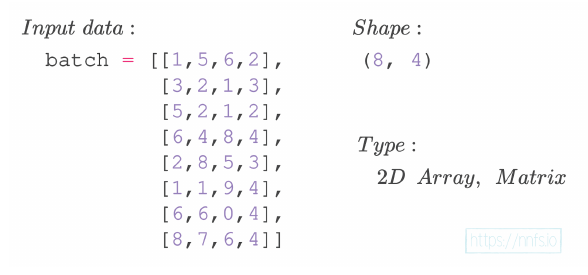

Each sub list is a feature set (observation)

## Matrix Product
A matrix product is an operation where we have 2 matrices and are performing a dot product of all combinations of rows from the
first matrix and columns from the second matrix. The result is a matrix of dot products.
- This operation feels like just basic matrix multiplication

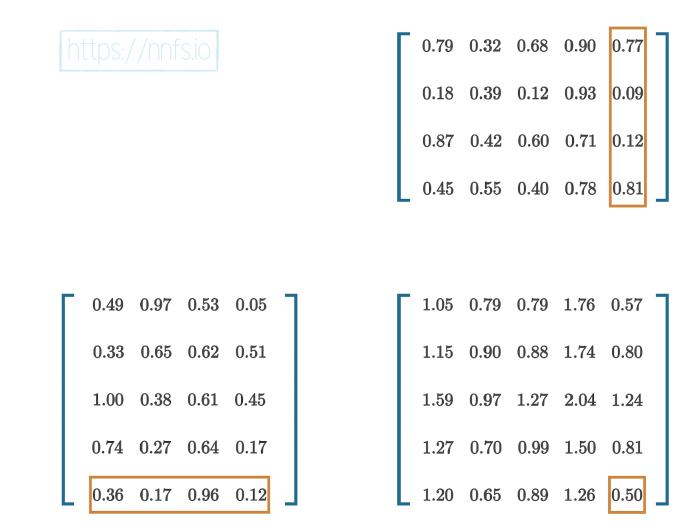

The size of the second dimension of the left matrix must match the size of the first dimension of the right matrix.
- ex: left: (5, 4) then the right must be (4, x)

The shape of the resulting array is always the first dimension of the left and second of the right
- ex: left: (5, 4) right: (4, 7) => result: (5, 7)

This can also be done with row and column vectors since row and column vectors are just matrices with one of their dimentsion of a size of 1

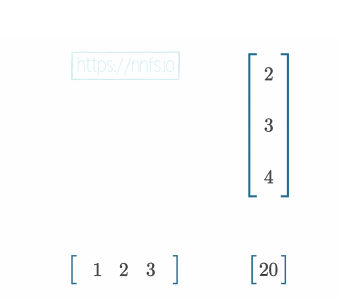


## Transposition for the Matrix Product
**Transposition** is an operation that changes a matrix such that the rows become the columns and the columns become rows:

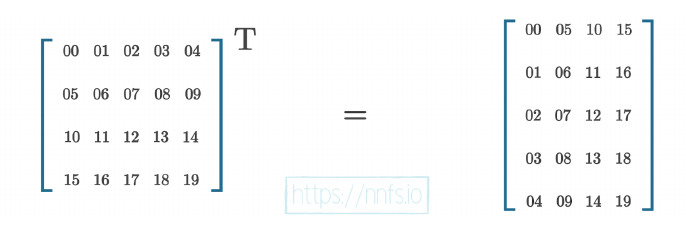

A row vector is an array of shape (1, n)

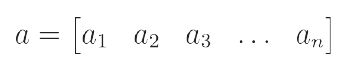

A column vector is an array of shape (n, 1)

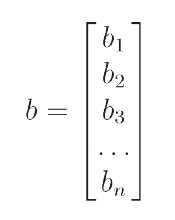

which can be created by taking the transpose of a row vector

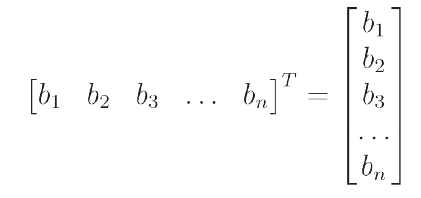

In numpy we can perform the dot product of two vectors by

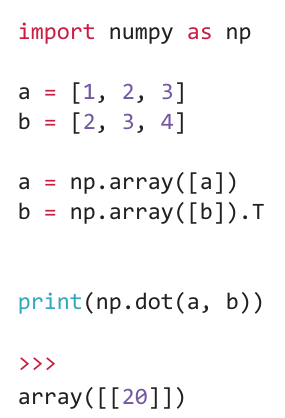

## Layer of Neurons & Batches with Numpy

When the inputs becomes a batch, we need to perform a matrix product. This means we need to transpose the weights into a column matrix since
each row (sample) is multiplied by each column (weights)

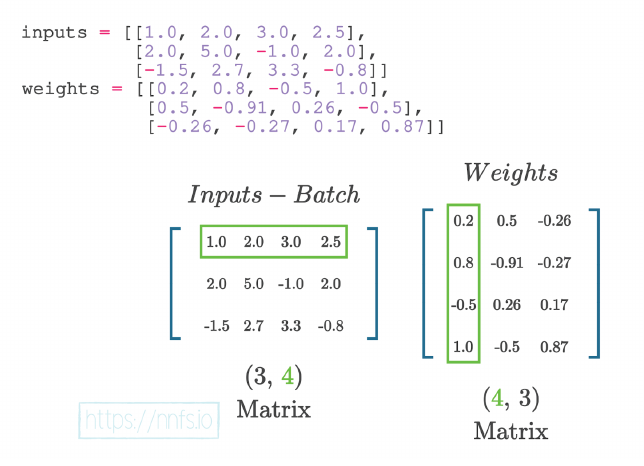



In [13]:
inputs = [
    [1.0, 2.0, 3.0, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8],
]
weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87],
]
biases = [2.0, 3.0, 0.5]

# transpose the weights so they are in column order
dot = np.dot(inputs, np.array(weights).T)
print (dot)

[[ 2.8   -1.79   1.885]
 [ 6.9   -4.81  -0.3  ]
 [-0.59  -1.949 -0.474]]


The biases is a 1D array so it will be added to each row of the resulting matrix product

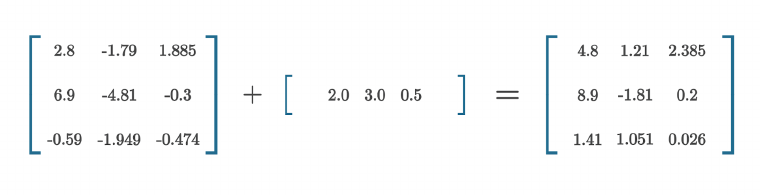


In [14]:
output = dot + biases
print(output)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]
